In [18]:
import numpy as np
import cv2
import PIL as PL
import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [19]:
IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])

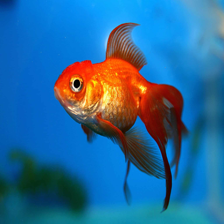

In [20]:
gold_fish = Image.open("goldfish.jpeg").resize(IMAGE_SHAPE)
gold_fish

In [21]:
gold_fish = np.array(gold_fish)/255
gold_fish.shape

(224, 224, 3)

In [22]:
gold_fish[np.newaxis, ...]

array([[[[0.01568627, 0.17254902, 0.40392157],
         [0.01568627, 0.17254902, 0.40392157],
         [0.01568627, 0.17254902, 0.40392157],
         ...,
         [0.16078431, 0.59607843, 0.81568627],
         [0.13333333, 0.58039216, 0.82745098],
         [0.12941176, 0.57647059, 0.82352941]],

        [[0.01960784, 0.17254902, 0.43529412],
         [0.01960784, 0.17254902, 0.43137255],
         [0.01960784, 0.17254902, 0.43137255],
         ...,
         [0.14901961, 0.59215686, 0.80784314],
         [0.12941176, 0.57647059, 0.82352941],
         [0.12941176, 0.57647059, 0.82352941]],

        [[0.01960784, 0.18431373, 0.4627451 ],
         [0.01960784, 0.18823529, 0.45882353],
         [0.01176471, 0.18823529, 0.44705882],
         ...,
         [0.16862745, 0.56862745, 0.80784314],
         [0.1372549 , 0.56862745, 0.82352941],
         [0.11764706, 0.57254902, 0.81960784]],

        ...,

        [[0.03137255, 0.29803922, 0.38823529],
         [0.03921569, 0.30588235, 0.39215686]

In [23]:
result = classifier.predict(gold_fish[np.newaxis, ...])
result.shape

1/1 [==============================] - 1s 703ms/step


(1, 1001)

In [24]:
labelled_result = np.argmax(result)
labelled_result

2

In [25]:
labels_path = tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
imagenet_labels = np.array(open(labels_path).read().splitlines())
imagenet_labels[:5]

array(['background', 'tench', 'goldfish', 'great white shark',
       'tiger shark'], dtype='<U30')

In [26]:
imagenet_labels[labelled_result]

'goldfish'

In [27]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

In [28]:
data_dir

'.\\datasets\\flower_photos'

In [29]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [30]:
list(data_dir.glob('*/*.jpg'))[:5]

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg')]

In [31]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [32]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

In [33]:
Image.fromarray

<function PIL.Image.fromarray(obj, mode=None)>

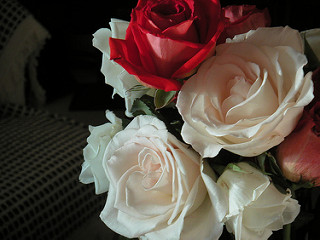

In [35]:
PL.Image.open(str(roses[1]))

In [36]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [37]:
flowers_images_dict['roses'][:5]


[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

In [38]:
str(flowers_images_dict['roses'][0])

'datasets\\flower_photos\\roses\\10090824183_d02c613f10_m.jpg'

In [40]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))
img.shape

(240, 179, 3)

In [41]:
cv2.resize(img,(224,224)).shape

(224, 224, 3)

In [42]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(224,224))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [43]:
X = np.array(X)
y = np.array(y)

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [45]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

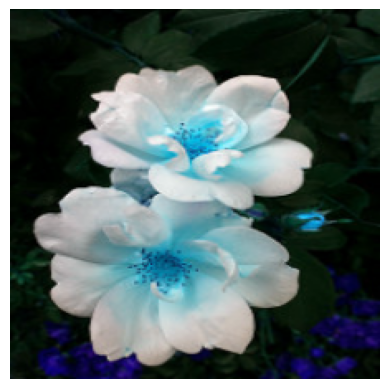

In [46]:
x0_resized = cv2.resize(X[0], IMAGE_SHAPE)
x1_resized = cv2.resize(X[1], IMAGE_SHAPE)
x2_resized = cv2.resize(X[2], IMAGE_SHAPE)
plt.axis('off')
plt.imshow(X[0])

In [47]:
predicted = classifier.predict(np.array([x0_resized, x1_resized, x2_resized]))
predicted = np.argmax(predicted, axis=1)
predicted

1/1 [==============================] - 17s 17s/step


array([795, 880, 795], dtype=int64)

In [48]:
imagenet_labels[795]

'shower curtain'

In [49]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)
num_of_flowers = 5

model = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(num_of_flowers)
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_2 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2264389 (8.64 MB)
Trainable params: 6405 (25.02 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [50]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

model.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5



86/86 [==============================] - 136s 562ms/step - loss: 0.8333 - acc: 0.6820
Epoch 2/5
86/86 [==============================] - 51s 588ms/step - loss: 0.4163 - acc: 0.8561
Epoch 3/5
86/86 [==============================] - 53s 621ms/step - loss: 0.3247 - acc: 0.8950
Epoch 4/5
86/86 [==============================] - 55s 638ms/step - loss: 0.2682 - acc: 0.9142
Epoch 5/5
86/86 [==============================] - 53s 621ms/step - loss: 0.2325 - acc: 0.9302


In [51]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 19s 564ms/step - loss: 0.3802 - acc: 0.8551


[0.38020429015159607, 0.8551198244094849]